In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime

In [225]:
pd.set_option('display.max_columns', None)
sns.reset_defaults()

In [133]:
df = pd.read_csv('Data/Sleep.csv')

In [134]:
#Data is allready clean, I used SQL to proccess it.
#Data test: Tquality is correct if the sum of these three columns is 100; otherwise, the row is corrupt

df['Check'] = df['REM sleep percentage'] + df['Deep sleep percentage'] + df['Light sleep percentage']
df['Check'].value_counts()

100    452
Name: Check, dtype: int64

In [135]:
#All the data is correct
df = df.drop('Check', axis=1)

In [136]:
#Check missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {pct_missing:.1%}')

Age - 0.0%
Gender - 0.0%
Sleep duration - 0.0%
Sleep efficiency - 0.0%
REM sleep percentage - 0.0%
Deep sleep percentage - 0.0%
Light sleep percentage - 0.0%
Awakenings - 0.0%
Caffeine consumption - 0.0%
Alcohol consumption - 0.0%
Smoking status - 0.0%
Exercise frequency - 0.0%
BedtimeHours - 0.0%
WakeuptimeHours - 0.0%
day - 0.0%
RealSleep - 0.0%
SleepRem - 0.0%
SleepDeep - 0.0%
SleepLight - 0.0%
RealNoSleep - 0.0%


In [137]:
#Rename columns
df = df.rename(columns={'Age': 'age',
                        'Gender': 'gender',
                        'Sleep duration': 'sleep_duration',
                        'Sleep efficiency': 'sleep_efficiency',
                        'REM sleep percentage': 'rem_percentage',
                        'Deep sleep percentage': 'deep_percentage',
                        'Light sleep percentage': 'light_percentage',
                        'Awakenings': 'awakenings',
                        'Caffeine consumption': 'caffeine',
                        'Alcohol consumption': 'alcohol',
                        'Smoking status': 'smoking',
                        'Exercise frequency': 'exercise',
                        'BedtimeHours': 'bedtime',
                        'WakeuptimeHours': 'wakeuptime',
                        'RealSleep': 'sleep_time',
                        'SleepRem': 'rem_time',
                        'SleepDeep': 'deep_time',
                        'SleepLight': 'light_time',
                        'RealNoSleep': 'nosleep_time'})

In [138]:
#Creating groups of the age for more clarity
df['grouped_age'] = pd.cut(df['age'], bins=range(0, 81, 20), right=False)
df['grouped_age']

0      [60, 80)
1      [60, 80)
2      [40, 60)
3      [40, 60)
4      [40, 60)
         ...   
447    [20, 40)
448    [40, 60)
449    [40, 60)
450    [40, 60)
451     [0, 20)
Name: grouped_age, Length: 452, dtype: category
Categories (4, interval[int64, left]): [[0, 20) < [20, 40) < [40, 60) < [60, 80)]

In [139]:
df['caffeine'].value_counts()

0      211
50     107
25      79
24      25
75      25
200      4
100      1
Name: caffeine, dtype: int64

In [140]:
#Improving caffeine data readavility 
df['caffeine'] = df['caffeine'].replace({24: 25})
df['caffeine'] = df['caffeine'].apply(lambda x: '>100' if x >= 100 else x)
df['caffeine'].value_counts()


0       211
50      107
25      104
75       25
>100      5
Name: caffeine, dtype: int64

In [141]:
day_dict = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

df['day_order'] = df['day'].map(day_dict)
df[['day', 'day_order']]

,day,day_order
0,Saturday,6
1,Sunday,7
2,Tuesday,2
3,Wednesday,3
4,Saturday,6
...,...,...
447,Saturday,6
448,Wednesday,3
449,Tuesday,2
450,Thursday,4


In [142]:
df[['day', 'day_order']]

,day,day_order
0,Saturday,6
1,Sunday,7
2,Tuesday,2
3,Wednesday,3
4,Saturday,6
...,...,...
447,Saturday,6
448,Wednesday,3
449,Tuesday,2
450,Thursday,4


In [168]:
df.dtypes

age                    int64
gender                object
sleep_duration       float64
sleep_efficiency     float64
rem_percentage         int64
deep_percentage        int64
light_percentage       int64
awakenings             int64
caffeine              object
alcohol                int64
smoking               object
exercise               int64
bedtime               object
wakeuptime            object
day                   object
sleep_time           float64
rem_time             float64
deep_time            float64
light_time           float64
nosleep_time         float64
grouped_age         category
day_order              int64
dtype: object

In [161]:
#Data fixed
df.head()

,age,gender,sleep_duration,sleep_efficiency,rem_percentage,deep_percentage,light_percentage,awakenings,caffeine,alcohol,smoking,exercise,bedtime,wakeuptime,day,sleep_time,rem_time,deep_time,light_time,nosleep_time,grouped_age,day_order
0,65,Female,6.0,0.88,18,70,12,0,0,0,Yes,3,01:00:00,07:00:00,Saturday,5.28,1.08,4.20,0.72,0.72,"[60, 80)",6
1,69,Male,7.0,0.66,19,28,53,3,0,3,Yes,3,02:00:00,09:00:00,Sunday,4.62,1.33,1.96,3.71,2.38,"[60, 80)",7
2,40,Female,8.0,0.89,20,70,10,1,0,0,No,3,21:30:00,05:30:00,Tuesday,7.12,1.60,5.60,0.80,0.88,"[40, 60)",2
3,40,Female,6.0,0.51,23,25,52,3,50,5,Yes,1,02:30:00,08:30:00,Wednesday,3.06,1.38,1.50,3.12,2.94,"[40, 60)",3
4,57,Male,8.0,0.76,27,55,18,3,0,3,No,3,01:00:00,09:00:00,Saturday,6.08,2.16,4.40,1.44,1.92,"[40, 60)",6


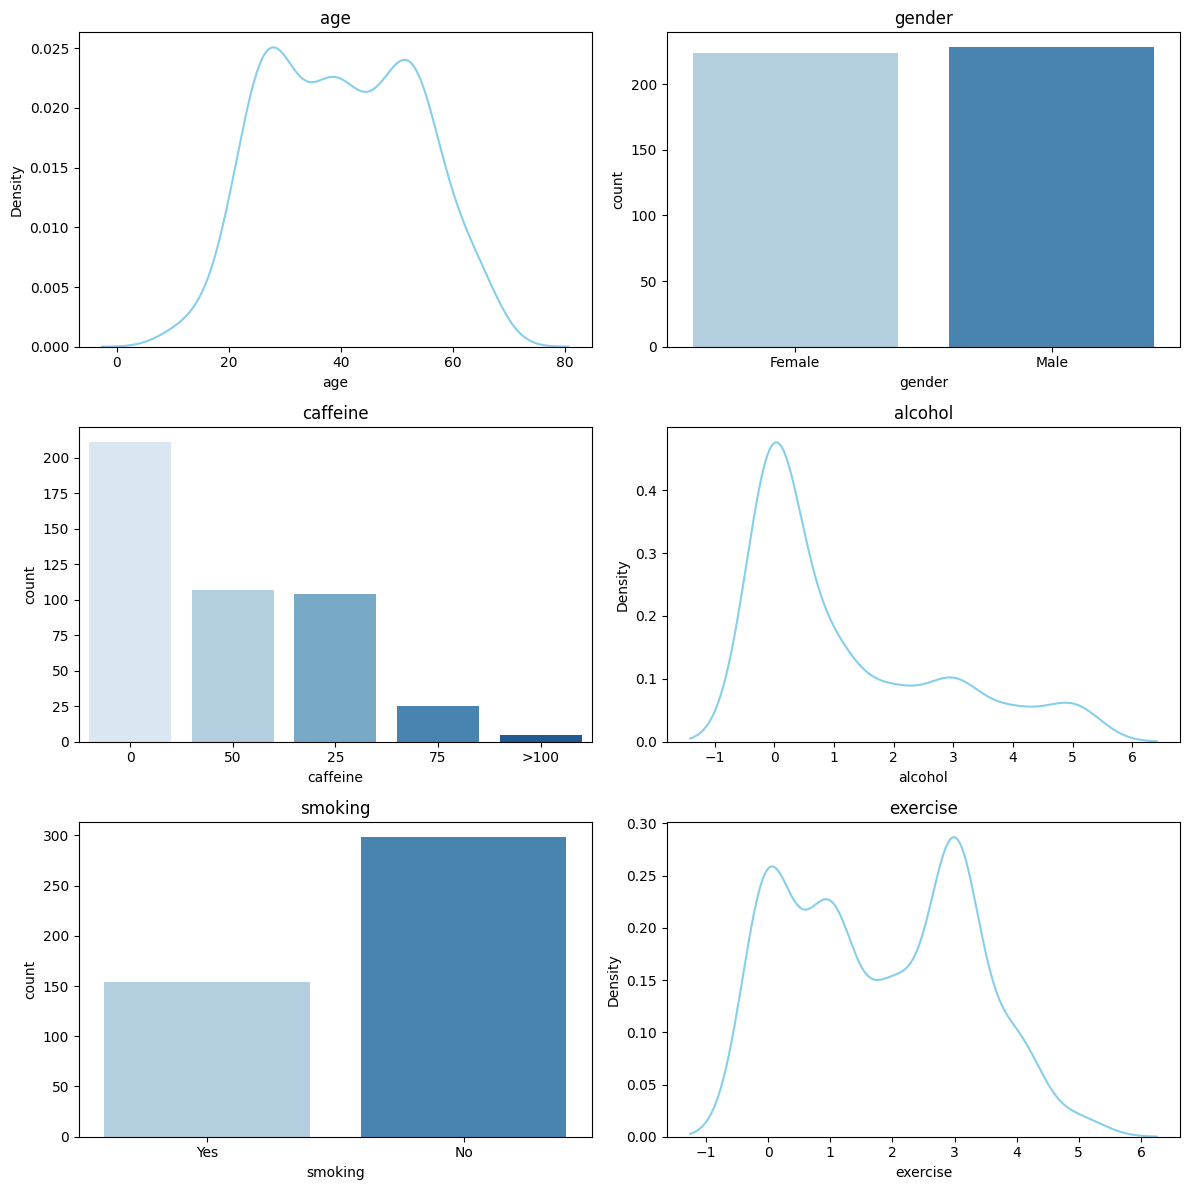

In [151]:

#Plot data related to the population
df_pop = df[['age', 'gender', 'caffeine', 'alcohol', 'smoking', 'exercise']]

fig, axs = plt.subplots(3, 2, figsize=(12, 12))
axs = axs.flatten()

for i, column in enumerate(df_pop.columns):
    if df_pop[column].dtype == 'object':  
        sns.countplot(data=df_pop, x=column, ax=axs[i], palette='Blues')
    else: 
        sns.kdeplot(data=df_pop, x=column, ax=axs[i], color='skyblue')
    axs[i].set_title(column)

plt.tight_layout()
plt.show()


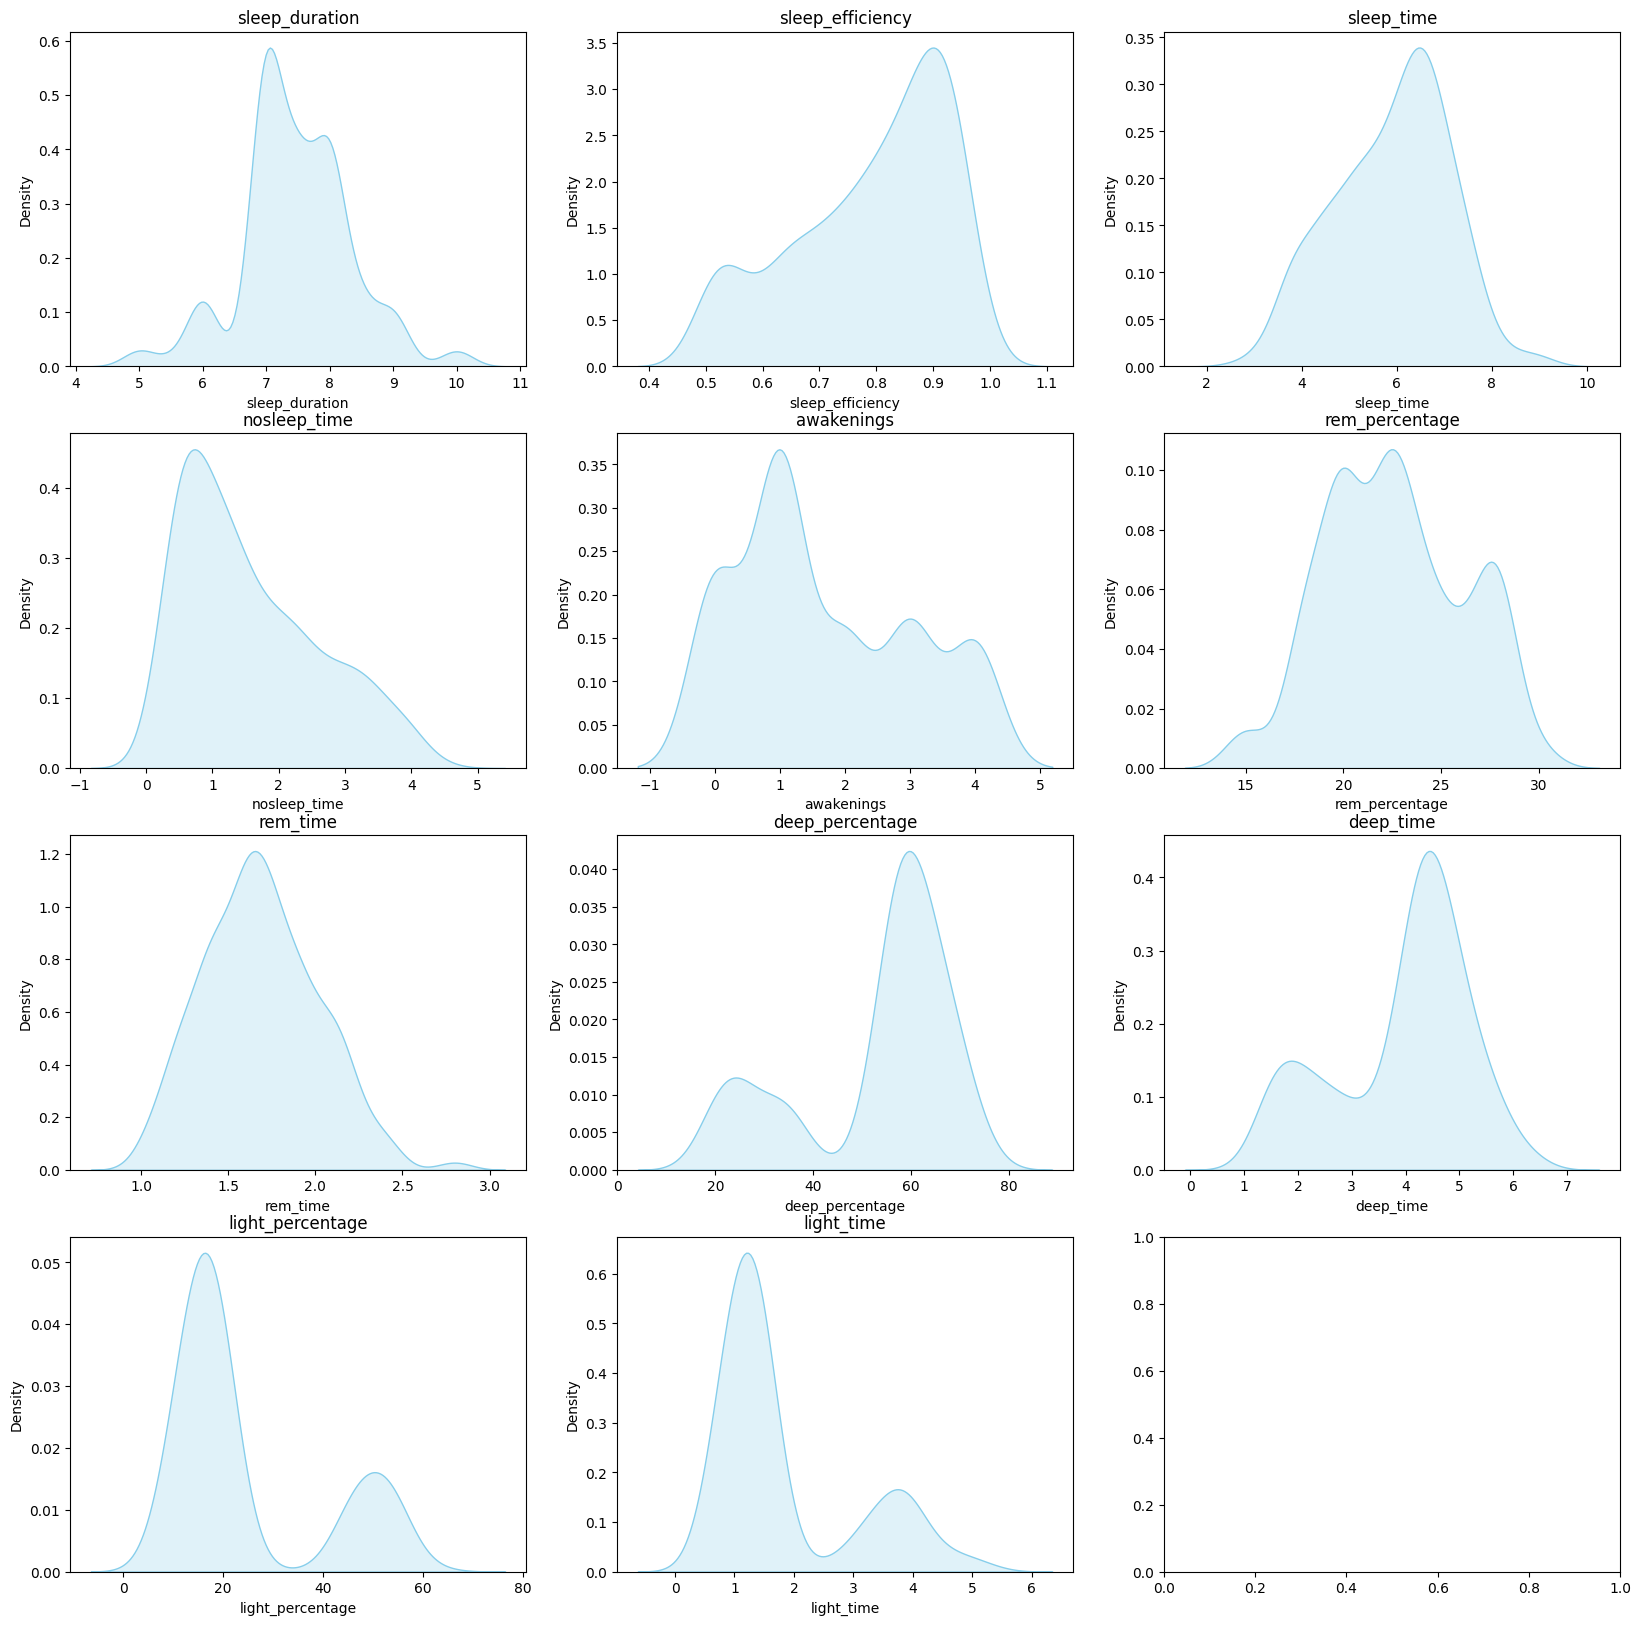

In [123]:
df_sleep = df[['sleep_duration', 'sleep_efficiency', 'sleep_time', 'nosleep_time', 'awakenings', 'rem_percentage', 'rem_time', 'deep_percentage', 'deep_time', 'light_percentage', 'light_time']]

fig, axs = plt.subplots(4, 3, figsize=(20, 20))
axs = axs.flatten()

for i, column in enumerate(df_sleep.columns):
    if df_sleep[column].dtype != 'object':
        sns.kdeplot(data=df_sleep, x=column, fill=True, ax=axs[i], color='skyblue')
        axs[i].set_title(column)
plt.show()

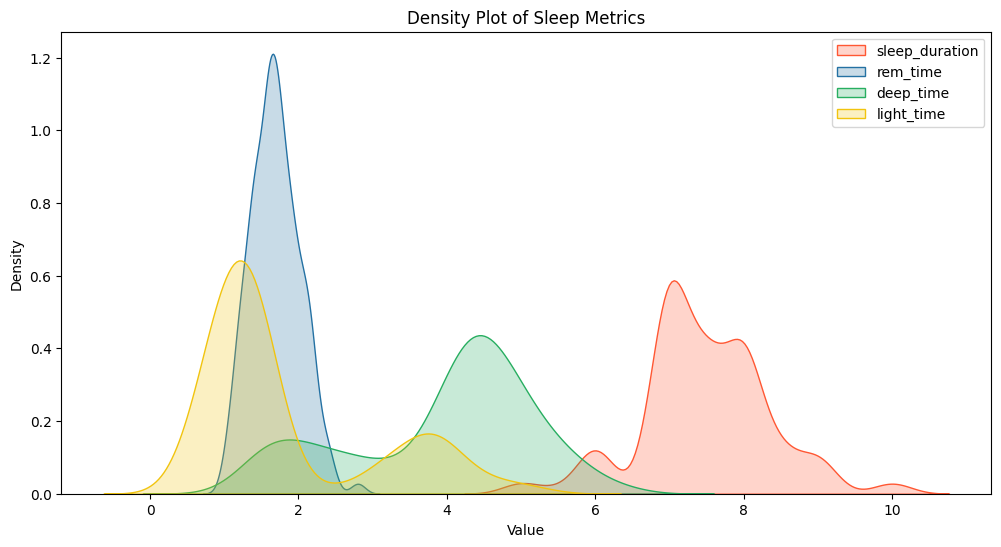

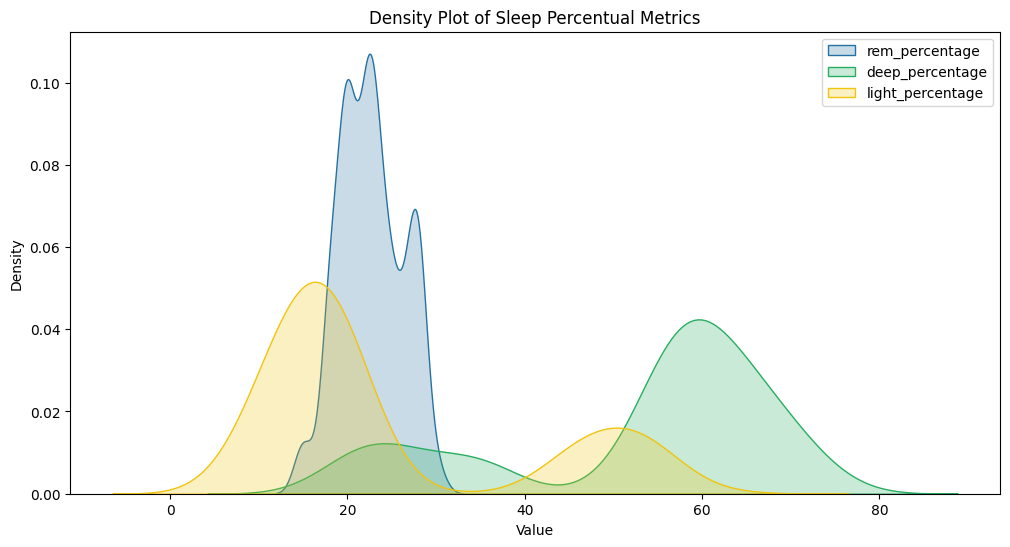

In [153]:
#Create density plot of sleep metrics
variables = ['sleep_duration', 'rem_time', 'deep_time', 'light_time']
#colors = ['#B23D3D', '#0B111C', '#205D66', '#81B7A4']
colors = ['#FF5733', '#2471A3', '#27AE60', '#F1C40F']

fig, ax = plt.subplots(figsize=(12,6))

for i in range(len(variables)):
    sns.kdeplot(data=df, x=variables[i], fill=True, ax=ax, color=colors[i], label=variables[i])

ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.set_title('Density Plot of Sleep Metrics')
ax.legend()

plt.show()


#Create density plot of sleep percentual metrics
variables_percentage = ['rem_percentage', 'deep_percentage', 'light_percentage']
colors_percentage = ['#2471A3', '#27AE60', '#F1C40F', '#FF5733']
#colors_percentage = ['#FF5733', '#C70039', '#900C3F', '#581845']
#colors_percentage = ['#B23D3D', '#0B111C', '#205D66', '#81B7A4']

fig, ax = plt.subplots(figsize=(12,6))

for i in range(len(variables_percentage)):
    sns.kdeplot(data=df, x=variables_percentage[i], fill=True, ax=ax, color=colors_percentage[i], label=variables_percentage[i])

ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.set_title('Density Plot of Sleep Percentual Metrics')
ax.legend()

plt.show()


Podemos observar como la distribución del sueño REM no se desarrolla de la misma manera en la parte proporcional. Esto ocurre porque la cantidad de tiempo REM apenas se ve afectada por el tiempo del sueño u otros factores, tendiendo a ser siempre el mismo valor.

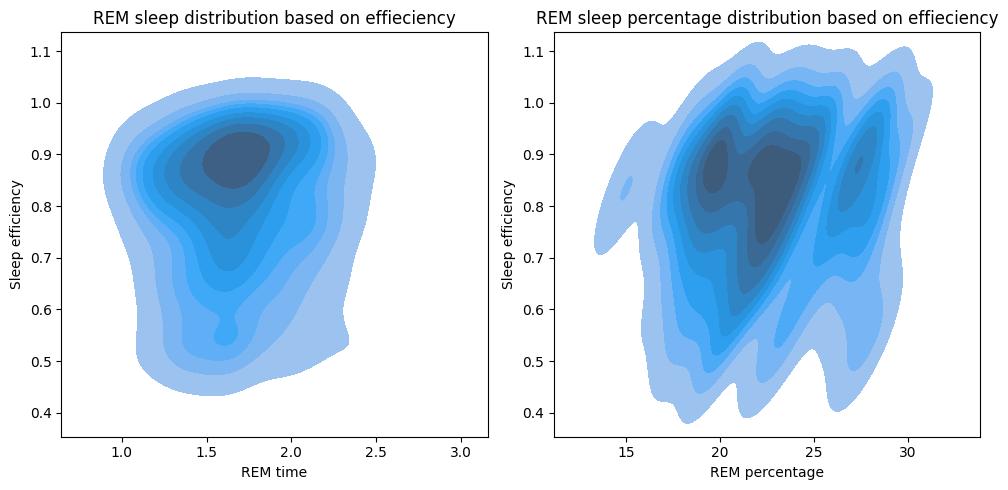

In [257]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.kdeplot(data=df, x="rem_time", y="sleep_efficiency", fill=True, ax=axes[0])
axes[0].set_xlabel("REM time")
axes[0].set_ylabel("Sleep efficiency")
axes[0].set_title("REM sleep distribution based on effieciency")

sns.kdeplot(data=df, x="rem_percentage", y="sleep_efficiency", fill=True, ax=axes[1])
axes[1].set_xlabel("REM percentage")
axes[1].set_ylabel("Sleep efficiency")
axes[1].set_title("REM sleep percentage distribution based on effieciency")

plt.tight_layout()
plt.show()

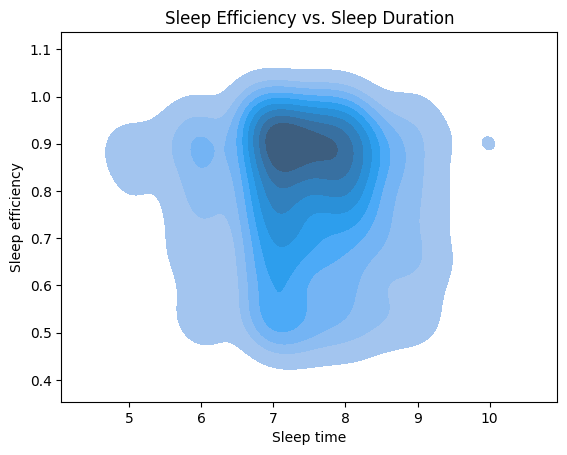

In [264]:
sns.kdeplot(data=df, x="sleep_duration", y="sleep_efficiency", fill=True).set(xlabel="Sleep time", ylabel="Sleep efficiency")
plt.title("Sleep Efficiency vs. Sleep Duration")
plt.show()

La duración más optima del sueño es de 7 a 8 horas, es la franja más eficiente.

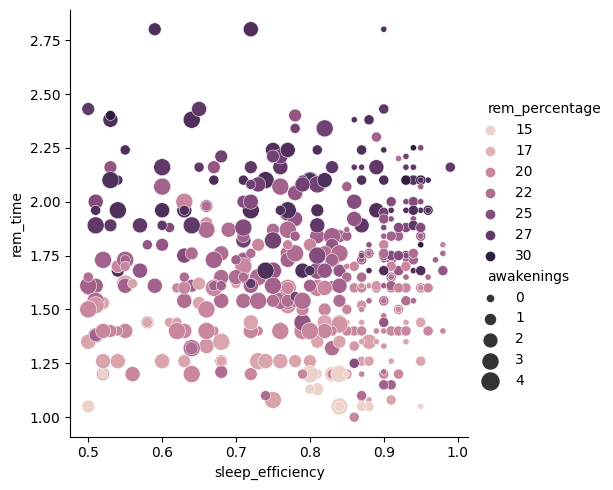

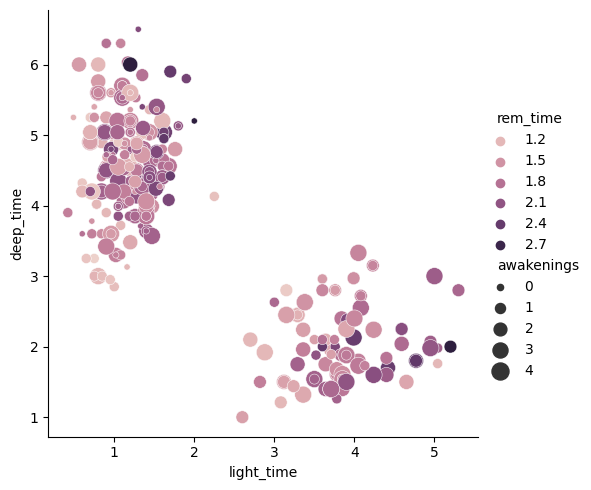

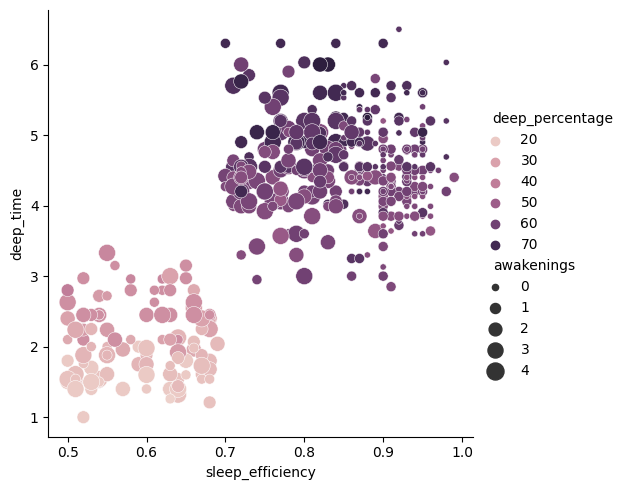

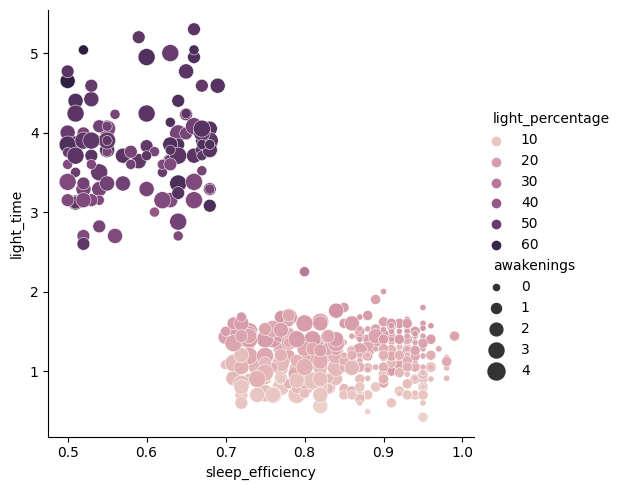

In [235]:
sns.relplot(
    data=df, x='sleep_efficiency', y='rem_time',
#    col='time',
    hue='rem_percentage',
    size='awakenings', sizes=(20, 150),
#    style='rem_percentage',
    kind='scatter',
#    legend='full'
)
plt.show()

sns.relplot(
    data=df, x='light_time', y='deep_time',
#    col='time',
    hue='rem_time',
    size='awakenings', sizes=(20, 150),
#    style='rem_percentage',
    kind='scatter',
#    legend='full'
)
plt.show()

sns.relplot(
    data=df, x='sleep_efficiency', y='deep_time',
#    col='time',
    hue='deep_percentage',
    size='awakenings', sizes=(20, 150),
#    style='rem_percentage',
    kind='scatter',
#    legend='full'
)
plt.show()

sns.relplot(
    data=df, x='sleep_efficiency', y='light_time',
#    col='time',
    hue='light_percentage',
    size='awakenings', sizes=(20, 150),
#    style='rem_percentage',
    kind='scatter',
#    legend='full'
)
plt.show()



Podemos ver como mientras que el porcentage varia más, la cantida de tiempo en sueño REM se mantiene bastante estable en el mismo valor, independientemente de la eficiancia del sueño, es decir, mientras otros tipos de sueño se ven afectados al tener un peor descanso, la cantidad de sueño REM apenas se ve afectado. 

En cambio el sueño deep y el light se ven muy afectados por la calidad del sueño y sus interrupciones, siendo estos inversamente proporcionales.

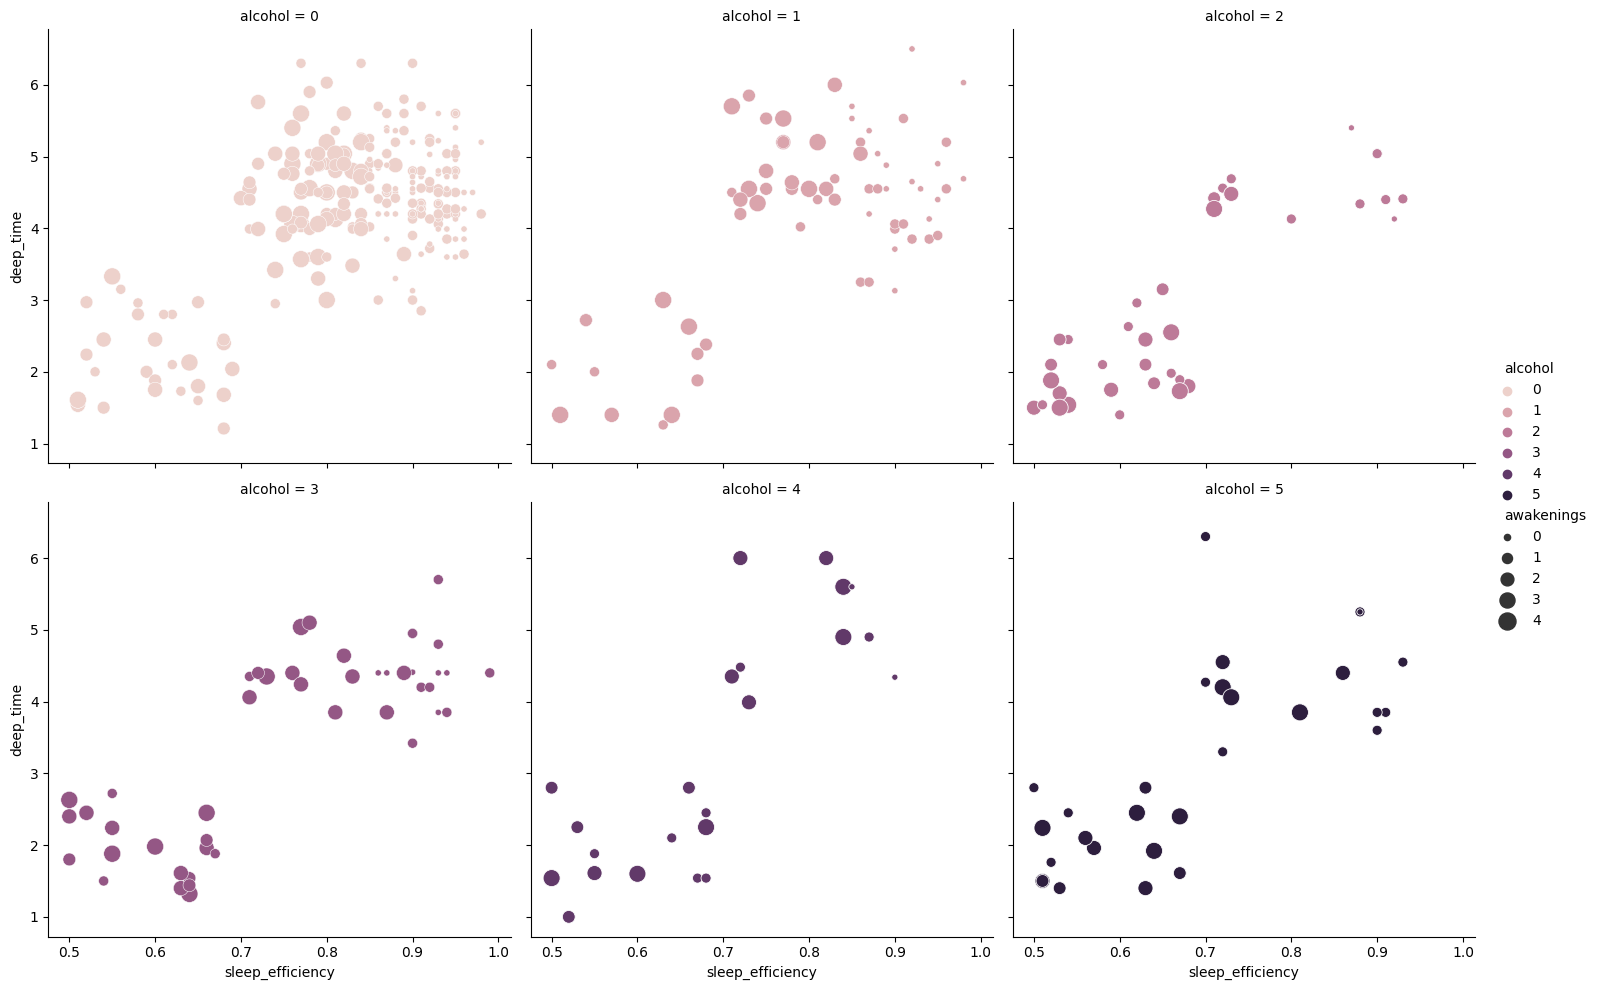

In [249]:
sns.relplot(
    data=df, x='sleep_efficiency', y='deep_time',
    col='alcohol',
    hue='alcohol',
    size='awakenings', sizes=(20, 150),
#    style='rem_percentage',
    kind='scatter',
#    legend='full'
    col_wrap=3,
)
plt.show()

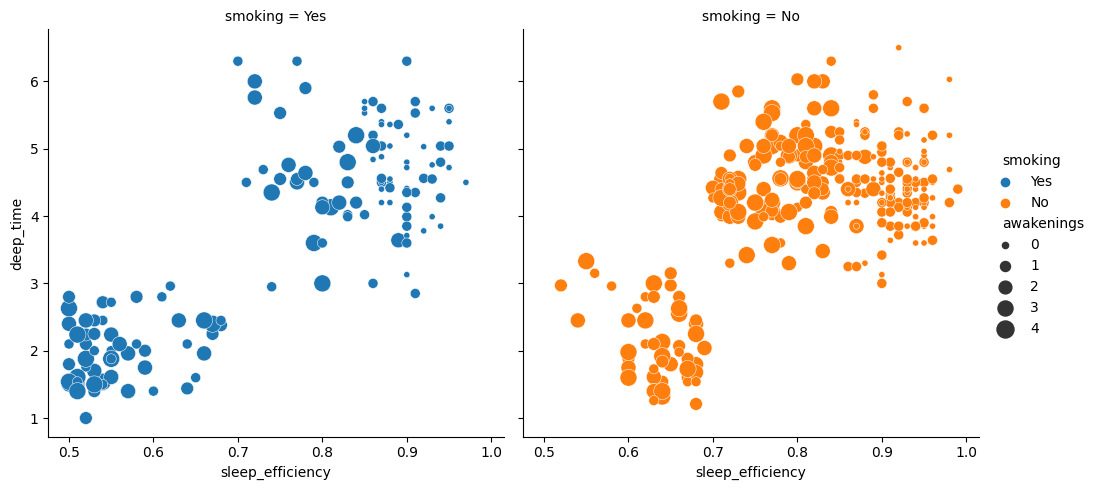

In [250]:
sns.relplot(
    data=df, x='sleep_efficiency', y='deep_time',
    col='smoking',
    hue='smoking',
    size='awakenings', sizes=(20, 150),
#    style='rem_percentage',
    kind='scatter',
#    legend='full'
    col_wrap=2,
)
plt.show()

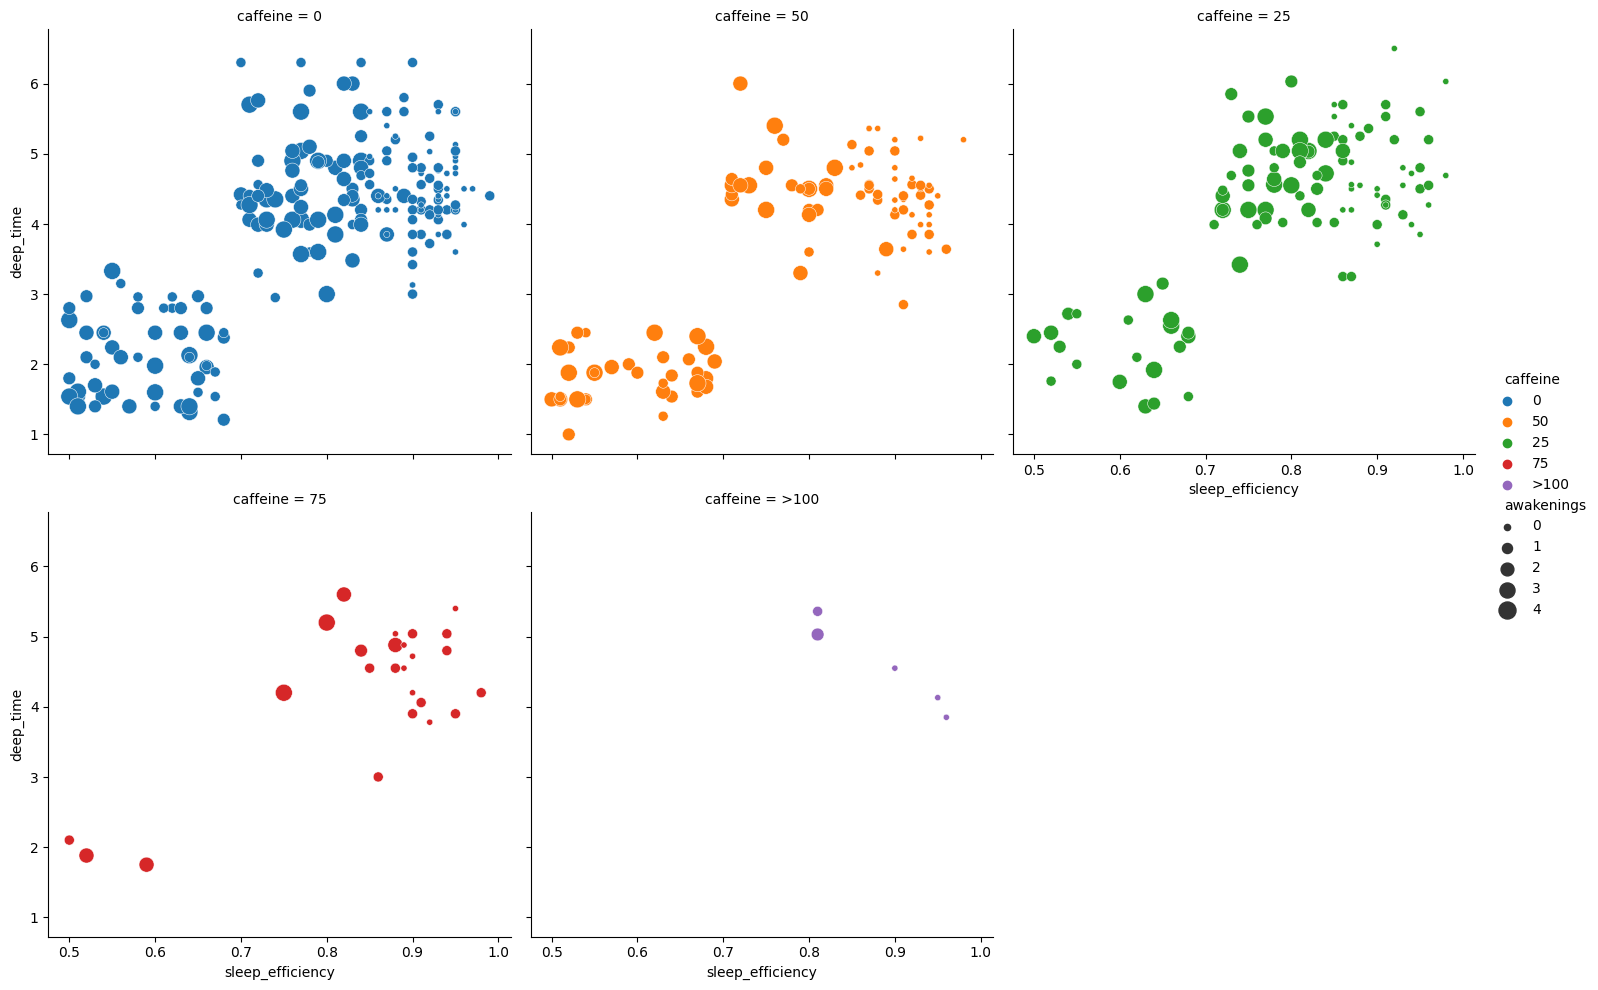

In [251]:
sns.relplot(
    data=df, x='sleep_efficiency', y='deep_time',
    col='caffeine',
    hue='caffeine',
    size='awakenings', sizes=(20, 150),
#    style='rem_percentage',
    kind='scatter',
#    legend='full'
    col_wrap=3,
)
plt.show()

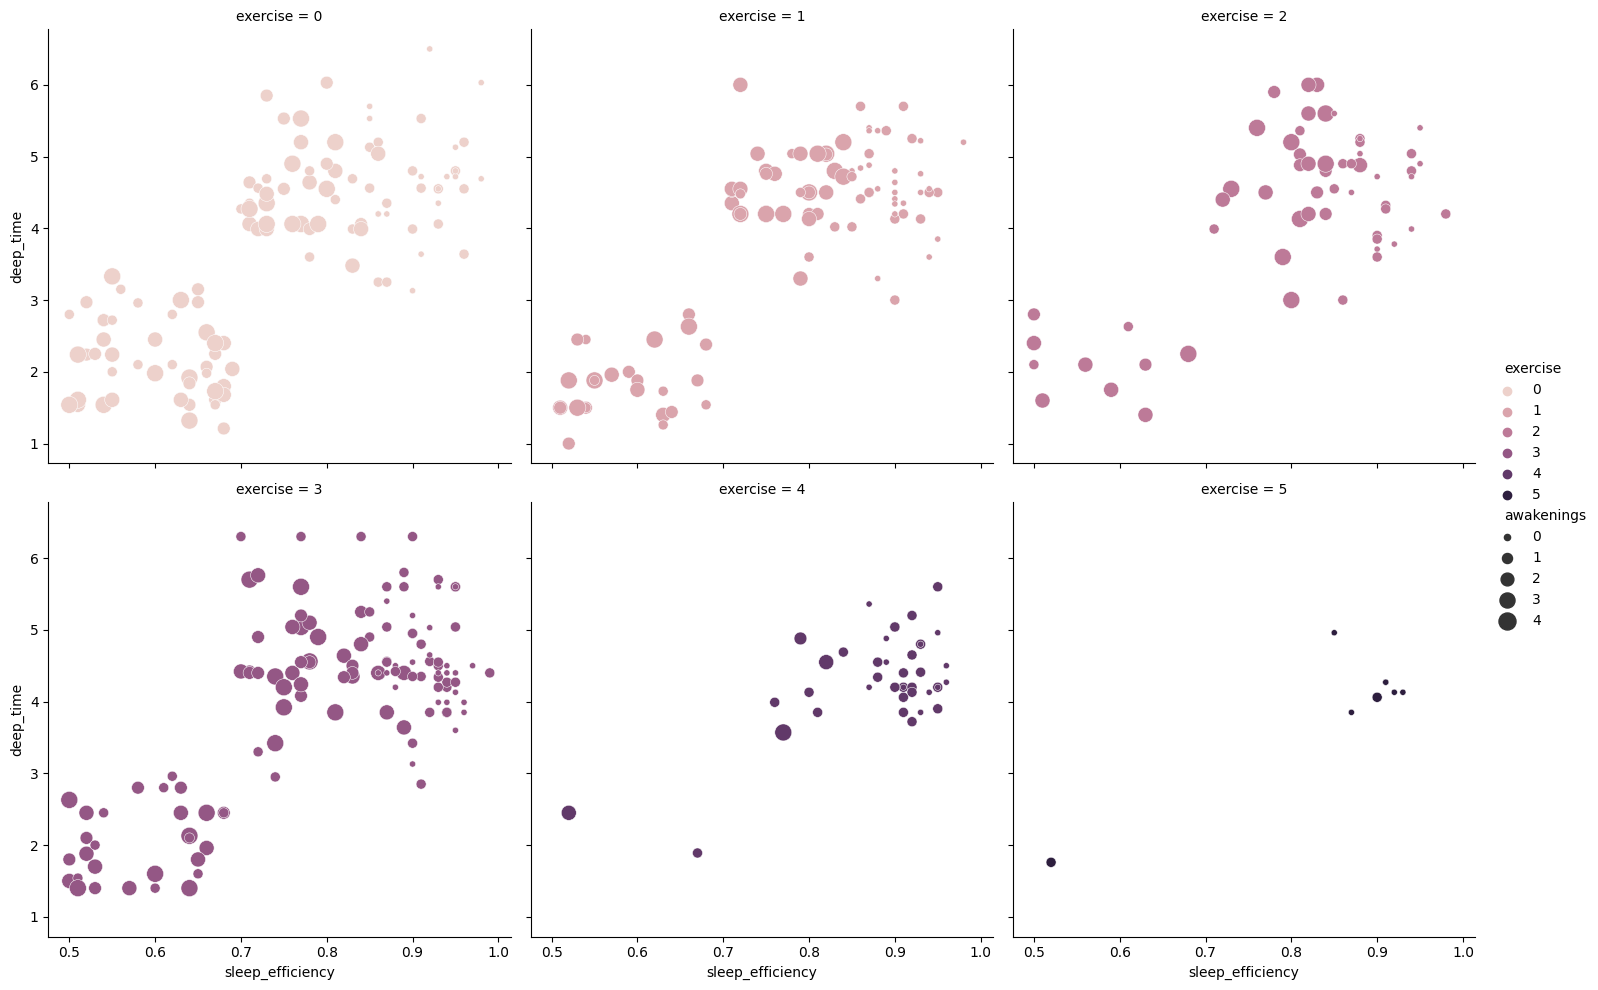

In [252]:
sns.relplot(
    data=df, x='sleep_efficiency', y='deep_time',
    col='exercise',
    hue='exercise',
    size='awakenings', sizes=(20, 150),
#    style='rem_percentage',
    kind='scatter',
#    legend='full'
    col_wrap=3,
)
plt.show()

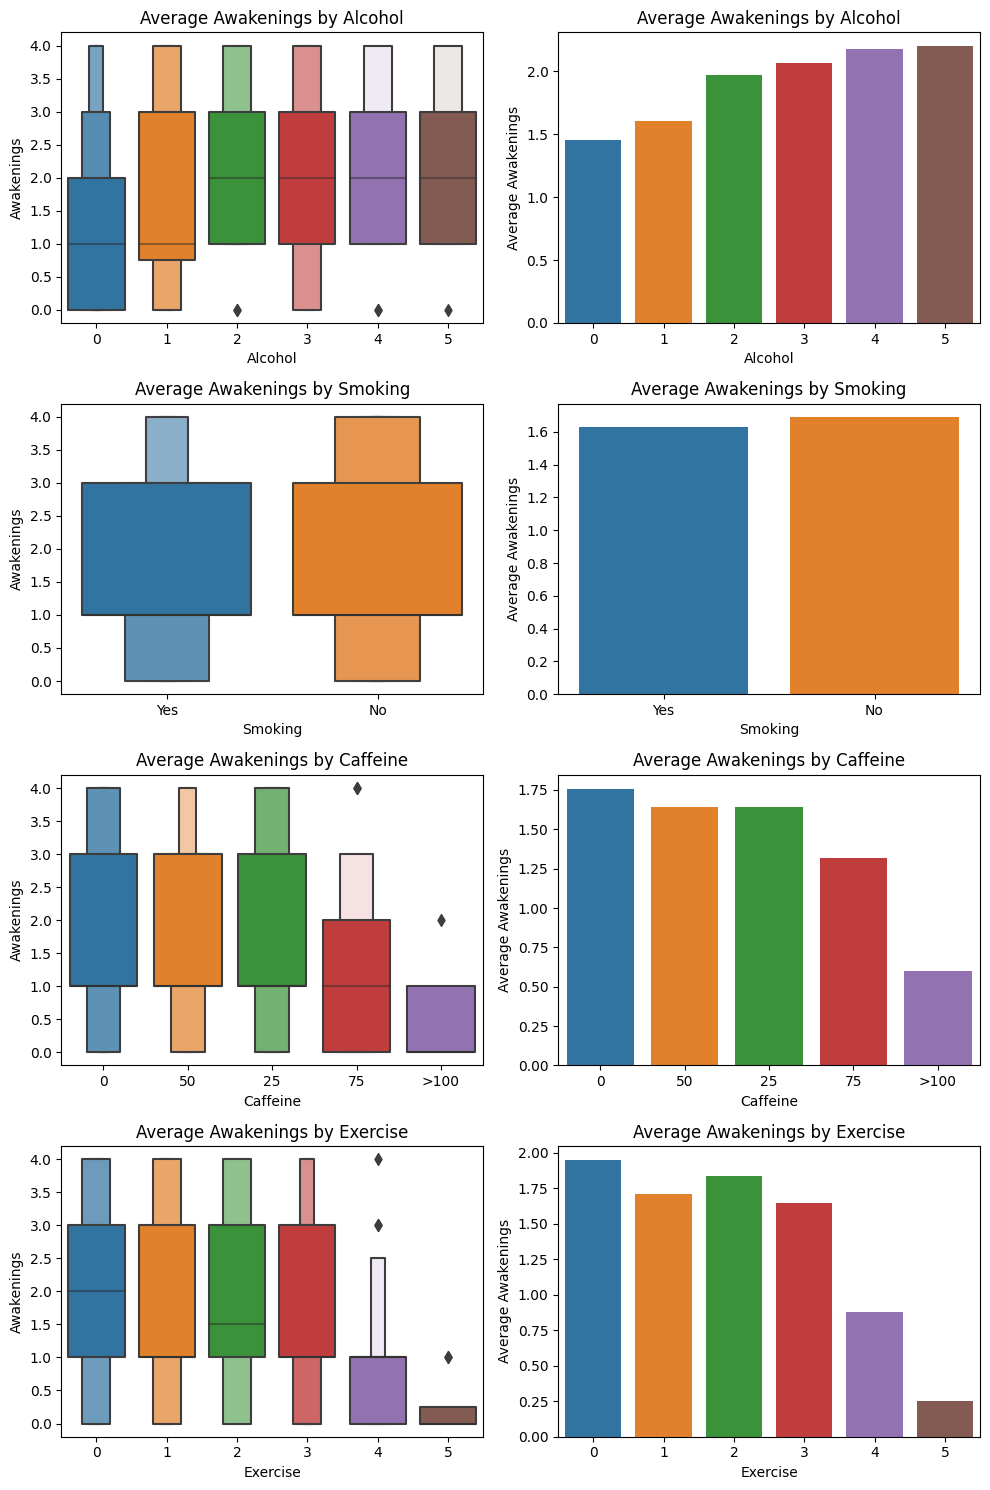

In [291]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 15))

sns.boxenplot(data=df, x="alcohol", y="awakenings", k_depth="trustworthy", ax=axes[0,0])
axes[0,0].set_xlabel('Alcohol')
axes[0,0].set_ylabel('Awakenings')
axes[0,0].set_title('Average Awakenings by Alcohol')

sns.barplot(data=df, x='alcohol', y='awakenings', errorbar=None, ax=axes[0,1])
axes[0,1].set_xlabel('Alcohol')
axes[0,1].set_ylabel('Average Awakenings')
axes[0,1].set_title('Average Awakenings by Alcohol')

sns.boxenplot(data=df, x="smoking", y="awakenings", k_depth="trustworthy", ax=axes[1,0])
axes[1,0].set_xlabel('Smoking')
axes[1,0].set_ylabel('Awakenings')
axes[1,0].set_title('Average Awakenings by Smoking')

sns.barplot(data=df, x='smoking', y='awakenings', errorbar=None, ax=axes[1,1])
axes[1,1].set_xlabel('Smoking')
axes[1,1].set_ylabel('Average Awakenings')
axes[1,1].set_title('Average Awakenings by Smoking')

sns.boxenplot(data=df, x="caffeine", y="awakenings", k_depth="trustworthy", ax=axes[2,0])
axes[2,0].set_xlabel('Caffeine')
axes[2,0].set_ylabel('Awakenings')
axes[2,0].set_title('Average Awakenings by Caffeine')

sns.barplot(data=df, x='caffeine', y='awakenings', errorbar=None, ax=axes[2,1])
axes[2,1].set_xlabel('Caffeine')
axes[2,1].set_ylabel('Average Awakenings')
axes[2,1].set_title('Average Awakenings by Caffeine')

sns.boxenplot(data=df, x="exercise", y="awakenings", k_depth="trustworthy", ax=axes[3,0])
axes[3,0].set_xlabel('Exercise')
axes[3,0].set_ylabel('Awakenings')
axes[3,0].set_title('Average Awakenings by Exercise')

sns.barplot(data=df, x='exercise', y='awakenings', errorbar=None, ax=axes[3,1])
axes[3,1].set_xlabel('Exercise')
axes[3,1].set_ylabel('Average Awakenings')
axes[3,1].set_title('Average Awakenings by Exercise')

plt.tight_layout()
plt.show()

Aqui ya podemos escribir como impactan los factores externos en la calidad de sueño, con la información sacada de las gráficas anteriores

In [292]:
#Ya solo nos queda sacar las correlaciones y estudiar la edad